In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
from scipy.interpolate import make_interp_spline


## Desktop CPU plots

### Chip Metrics Plot
*Tot CFP, Mfg CFP %, Ope CFP %, CFPA, Process Node, DieSize*

In [2]:
def set_plot_ax(ax):
    ax.yaxis.label.set_size(14)
    ax.yaxis.label.set_fontweight('bold')
    ax.xaxis.label.set_size(14)
    ax.xaxis.label.set_fontweight('bold')
    ax.title.set_fontsize(16)
    ax.title.set_fontweight('bold')
    for label in ax.get_yticklabels():
        label.set_fontsize(12)
        label.set_fontweight('bold')

    for tick in ax.get_xticklabels():
        # tick.set_rotation(15)
        tick.set_fontsize(12)
        tick.set_fontweight('bold')

    for label in ax.get_yticklabels():
        label.set_fontweight('bold')
        label.set_fontsize(12)  


In [3]:
def fake_arr(arr):

    fake = np.zeros(len(arr) * 2 - 1)
    for i in range(len(arr)):
        fake[i * 2] = arr[i]
        if i < len(arr) - 1:
            fake[i * 2 + 1] = (arr[i] + arr[i + 1]) / 2

    return fake

fake_arr([1, 2, 3, 4, 5])

array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [4]:
def fake_arr2(arr):
    # First iteration: Double the points by adding midpoints
    fake = np.zeros(len(arr) * 2 - 1)
    for i in range(len(arr)):
        fake[i * 2] = arr[i]
        if i < len(arr) - 1:
            fake[i * 2 + 1] = (arr[i] + arr[i + 1]) / 2
    
    # Second iteration: Double the points again by adding midpoints
    result = np.zeros(len(fake) * 2 - 1)
    for i in range(len(fake)):
        result[i * 2] = fake[i]
        if i < len(fake) - 1:
            result[i * 2 + 1] = (fake[i] + fake[i + 1]) / 2
    
    return result


fake_arr2([1, 2, 3, 4, 5])

array([1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 , 2.75, 3.  , 3.25, 3.5 ,
       3.75, 4.  , 4.25, 4.5 , 4.75, 5.  ])

In [5]:
def chip_metrics_plot(nv, server=True):
    # Define style constants for easy tuning
    FACTOR = 2
    # TITLE_FONT_SIZE = 22 * FACTOR
    # LABEL_FONT_SIZE = 18 * FACTOR
    TICK_FONT_SIZE = 14 * FACTOR
    AXIS_LABEL_FONT_SIZE = 16 * FACTOR
    LEGEND_FONT_SIZE = 15 * FACTOR
    LINE_WIDTH = 5 * FACTOR
    MARKER_SIZE = 10 * FACTOR
    GRID_ALPHA = 0.2
    LABEL_COLOR = '#4a4a4a'
    SPLINE = 3  # Spline interpolation factor


    # Colors from the provided palette

    COLOR_5 = '#248F24'  # Light green
    COLOR_2 = '#D62728'  # Orange-yellow
    COLOR_6 = '#457B9D'  # Muted sky blue


    plot_title = 'Datacenter CPUs Sustainability Metrics' if server else 'Desktop CPUs Sustainability Metrics'
    x_label = 'Intel Datacenter CPUs' if server else 'Intel Desktop CPUs'

    # Create figure and main axis
    fig1, ax1 = plt.subplots(figsize=(20, 12))
    # ax1.set_title(plot_title, fontsize=TITLE_FONT_SIZE, fontweight='bold', color=LABEL_COLOR, pad=20)
    # ax1.set_xlabel(x_label, fontsize=LABEL_FONT_SIZE, fontweight='bold', color=LABEL_COLOR, labelpad=15)


    # Prepare data
    x_data_fake = fake_arr(np.arange(len(nv['Product'])))  # Using indices for smooth interpolation
    x_data_fake2 = fake_arr2(np.arange(len(nv['Product'])))
    x_data = np.arange(len(nv['Product']))  # Original x-axis
    x_labels = nv['Product']  # Original product labels
    x_smooth = np.linspace(x_data_fake.min(), x_data_fake.max(), 500)  # Smoother x-axis

    # Manufacture CFP percentage (smoothened line with original markers)
    y_mfg_cfp_fake = fake_arr(nv['Mfg CFP percentage'])
    y_mfg_cfp = (nv['Mfg CFP percentage'])
    spline_mfg = make_interp_spline(x_data_fake, y_mfg_cfp_fake, k=SPLINE)
    y_mfg_smooth = spline_mfg(x_smooth)
    ax1.set_ylabel(ylabel='CFP Percentage', fontsize=AXIS_LABEL_FONT_SIZE, fontweight='bold', color=COLOR_2)  
    ax1.plot(x_smooth, y_mfg_smooth, label='%ECFP', color=COLOR_2, linewidth=LINE_WIDTH)
    ax1.plot(x_data, y_mfg_cfp, 's', markersize=MARKER_SIZE, color=COLOR_2, alpha=0.8)  # Plot markers at original points

    # Operational CFP percentage (smoothened line with original markers)
    y_ope_cfp = nv['Ope CFP percentage']
    spline_ope = make_interp_spline(x_data, y_ope_cfp, k=SPLINE)
    y_ope_smooth = spline_ope(x_smooth)
    ax1.plot(x_smooth, y_ope_smooth, label='%OCFP', color=COLOR_2, linestyle='--', linewidth=LINE_WIDTH)  # Orange-yellow
    ax1.plot(x_data, y_ope_cfp, 's', markersize=MARKER_SIZE, color=COLOR_2, alpha=0.8)  # Plot markers at original points

    ax1.set_xticks(x_data)  # Set x-ticks to original positions
    ax1.set_xticklabels(x_labels, fontsize=TICK_FONT_SIZE, fontweight='bold', color=LABEL_COLOR)  # Set original product names as labels

    ax1.tick_params(axis='x', rotation=15)
    ax1.tick_params(axis='both', which='major', labelsize=TICK_FONT_SIZE, colors=LABEL_COLOR)

    # Add a light grid for better readability
    ax1.grid(visible=True, linestyle='--', linewidth=1, alpha=GRID_ALPHA)

    ax1.spines['left'].set_linewidth(2)
    ax1.spines['left'].set_color(COLOR_2)
    ax1.spines['left'].set_position(('outward', 20))

    ax1.spines['bottom'].set_linewidth(2)
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)

    # Set tick labels to be bold for the left y-axis (CFP Percentage %)
    for label in ax1.get_yticklabels():
        label.set_color(COLOR_2)
        label.set_fontweight('bold')
        label.set_fontsize(TICK_FONT_SIZE)

    # Release Date (Secondary X Axis)
    ax2 = ax1.twiny()
    ax2.set_xlim(ax1.get_xlim())
    ax2.set_xticks(x_data)
    ax2.set_xlabel('Release Year', fontsize=AXIS_LABEL_FONT_SIZE, fontweight='bold', color=LABEL_COLOR, labelpad=10)
    ax2.set_xticklabels(nv['Release Date'], fontsize=TICK_FONT_SIZE, fontweight='bold', color=LABEL_COLOR)
    ax2.spines['top'].set_linewidth(2)
    ax2.spines['right'].set_visible(False)
    ax2.spines['left'].set_visible(False)

    # Process Node (Tertiary X Axis)
    ax3 = ax1.twiny()
    ax3.set_xlim(ax1.get_xlim())
    ax3.set_xticks(x_data)
    ax3.set_xlabel('Process Node(nm)', fontsize=AXIS_LABEL_FONT_SIZE, fontweight='bold', color=LABEL_COLOR, labelpad=10)
    ax3.set_xticklabels(nv['Process Size (nm)'], fontsize=TICK_FONT_SIZE, fontweight='bold', color=LABEL_COLOR)
    ax3.spines['top'].set_linewidth(2)
    ax3.spines['top'].set_position(('outward', 80))
    ax3.spines['right'].set_visible(False)
    ax3.spines['left'].set_visible(False)

# Re-apply settings to ensure font size is correctly applied
    for label in ax3.get_xticklabels():
        label.set_fontsize(TICK_FONT_SIZE)
        label.set_fontweight('bold')
        label.set_color(LABEL_COLOR)

    # Total CFP (smoothened line with original markers)
    cfp_color = COLOR_6  # Blue
    y_tot_cfp_fake = fake_arr(nv['Tot CFP'])
    y_tot_cfp = nv['Tot CFP']
    spline_tot_cfp = make_interp_spline(x_data_fake, y_tot_cfp_fake, k=SPLINE)
    y_tot_smooth = spline_tot_cfp(x_smooth)
    ax4 = ax1.twinx()
    ax4.set_ylabel(r'CFP $(kg\ CO_2 e.q.)$', fontsize=AXIS_LABEL_FONT_SIZE, fontweight='bold', color=cfp_color, labelpad=15)
    ax4.plot(x_smooth, y_tot_smooth, label='Total CFP', color=cfp_color, linewidth=LINE_WIDTH)
    ax4.plot(x_data, y_tot_cfp, 's', markersize=MARKER_SIZE, color=cfp_color, alpha=0.8)  # Plot markers at original points
    ax4.spines['right'].set_color(cfp_color)
    ax4.spines['right'].set_linewidth(2)
    ax4.spines['right'].set_position(('outward', 30))
    ax4.spines['left'].set_visible(False)
    ax4.spines['top'].set_visible(False)

    for label in ax4.get_yticklabels():
        label.set_color(cfp_color)
        label.set_fontweight('bold')
        label.set_fontsize(TICK_FONT_SIZE)

    # Die Size (smoothened line with original markers)
    die_color = COLOR_5  # Medium green
    y_die_size_fake = fake_arr(nv['DieSizeValue'])
    y_die_size = nv['DieSizeValue']
    spline_die_size = make_interp_spline(x_data_fake, y_die_size_fake, k=SPLINE)
    y_die_smooth = spline_die_size(x_smooth)
    ax6 = ax1.twinx()
    ax6.set_ylabel(r'Die Area($mm^2$)', fontsize=AXIS_LABEL_FONT_SIZE, fontweight='bold', color=die_color, labelpad=15)
    ax6.plot(x_smooth, y_die_smooth, label='Die Area', color=die_color, linewidth=LINE_WIDTH)
    ax6.plot(x_data, y_die_size, 's', markersize=MARKER_SIZE, color=die_color, alpha=0.8)  # Plot markers at original points
    ax6.yaxis.set_label_position('left')
    ax6.yaxis.set_ticks_position('left')
    ax6.spines['left'].set_color(die_color)
    ax6.spines['left'].set_linewidth(2)
    ax6.spines['left'].set_position(('outward', 140))
    ax6.spines['right'].set_visible(False)
    ax6.spines['top'].set_visible(False)

    for label in ax6.get_yticklabels():
        label.set_color(die_color)
        label.set_fontweight('bold')
        label.set_fontsize(TICK_FONT_SIZE)

    # Add legend

    if server:
        fig1.legend(loc='upper center', fontsize=AXIS_LABEL_FONT_SIZE, frameon=False, ncol=1, bbox_to_anchor=(0.3, 0.8))

    else:
        fig1.legend(loc='upper center', fontsize=AXIS_LABEL_FONT_SIZE, frameon=False, ncol=1, bbox_to_anchor=(0.8, 0.8))

    return fig1


In [6]:
def performance_metric_plot(nv, server=True):
    # Define style constants for easy tuning
    FACTOR = 2
    # TITLE_FONT_SIZE = 22 * FACTOR
    # LABEL_FONT_SIZE = 18 * FACTOR
    TICK_FONT_SIZE = 14 * FACTOR
    AXIS_LABEL_FONT_SIZE = 16 * FACTOR
    LEGEND_FONT_SIZE = 15 * FACTOR
    LINE_WIDTH = 5 * FACTOR
    MARKER_SIZE = 10 * FACTOR
    GRID_ALPHA = 0.2
    LABEL_COLOR = '#4a4a4a'

    SPLINE = 3  # Spline interpolation factor
    # Colors from the provided palette

    # COLOR_1 = '#B02425'  # Dark red
    COLOR_1 = '#FF5252'  # 

    COLOR_2 = '#FFA500'  # Orange-yellow (corrected to actual orange-yellow)
    COLOR_4 = '#248F24'  # Light green (added as missing COLOR_3)
    COLOR_5 = '#4169E1'  # Medium blue (corrected description from "medium green")
    COLOR_3 = '#4F4F4F'  # Dark color

    # COLOR1 = COLOR_4
    # COLOR_2 = COLOR_3
    # COLOR_4 = COLOR_3
    # COLOR_5 = COLOR_3

    SMOOTH_FACTOR = 3

    # Plot and axis labels
    plot_title = 'Datacenter CPUs Normalized Performance Efficiency' if server else 'Desktop CPUs Normalized Performance Efficiency'
    x_label = 'Intel Datacenter CPUs' if server else 'Intel Desktop CPUs'

    # Auto-set figure size based on input data
    fig_width = 20  # Set a minimum width of 10, scale with number of products
    fig_height = 12  # Fixed height for better readability

    # Create figure and main axis
    fig1, ax1 = plt.subplots(figsize=(fig_width, fig_height))
    # ax1.set_title(plot_title, fontsize=TITLE_FONT_SIZE, fontweight='bold', color=LABEL_COLOR, pad=20)
    # ax1.set_xlabel(x_label, fontsize=LABEL_FONT_SIZE, fontweight='bold', color=LABEL_COLOR, labelpad=15)

    # Adjust spacing to avoid overlap
    plt.subplots_adjust(top=0.85, bottom=0.1, left=0.1, right=0.9, hspace=0.3)

    # Prepare data
    x_data_fake = fake_arr(np.arange(len(nv['Product'])))  # Using indices for smooth interpolation
    x_data_fake2 = fake_arr2(np.arange(len(nv['Product'])))
    x_data = np.arange(len(nv['Product']))  # Using indices for smooth interpolation
    x_labels = nv['Product']  # Original product labels
    x_smooth = np.linspace(x_data.min(), x_data.max(), 500)  # Smoother x-axis

    # OpenCL Score (smoothened line with original markers)
    y_opencl_score = nv['PassMark CPU score'] if server else nv['Multi-Core Score']
    spline_opencl = make_interp_spline(x_data, y_opencl_score, k=SMOOTH_FACTOR)
    y_opencl_smooth = spline_opencl(x_smooth)
    score_color = COLOR_5
    ax1.set_ylabel('Normalized Factor', fontsize=AXIS_LABEL_FONT_SIZE, fontweight='bold', color=LABEL_COLOR)
    # ax1.set_ylabel('Performance', fontsize=AXIS_LABEL_FONT_SIZE, fontweight='bold')
    ax1.plot(x_smooth, y_opencl_smooth, label='Performance', color=score_color, linewidth=LINE_WIDTH)
    ax1.plot(x_data, y_opencl_score, 's', markersize=MARKER_SIZE, color=score_color, alpha=0.8)

    # Performance / Total CFP on the same y-axis
    cfp_color = COLOR_4
    y_opencl_cfp = nv['Score / CFP'] if server else nv['Multi-Core / CFP']
    spline_opencl_cfp = make_interp_spline(x_data, y_opencl_cfp, k=SMOOTH_FACTOR)
    y_opencl_cfp_smooth = spline_opencl_cfp(x_smooth)
    ax1.plot(x_smooth, y_opencl_cfp_smooth, label='Performance / CFP', color=cfp_color, linewidth=LINE_WIDTH)
    ax1.plot(x_data, y_opencl_cfp, 's', markersize=MARKER_SIZE, color=cfp_color, alpha=0.8)

    # Performance / Embodied CFPA on the same y-axis
    transistor_color = COLOR_2
    y_trans_score = nv['Score / ECFPA'] if server else nv['Multi-Core Score / Embodied CFPA']
    spline_trans_score = make_interp_spline(x_data, y_trans_score, k=SMOOTH_FACTOR)
    y_trans_score_smooth = spline_trans_score(x_smooth)
    ax1.plot(x_smooth, y_trans_score_smooth, label='Performance / Embodied CFPA', linestyle = '--', color=transistor_color, linewidth=LINE_WIDTH)
    ax1.plot(x_data, y_trans_score, 's', markersize=MARKER_SIZE, color=transistor_color, alpha=0.8)

    # Axis configuration
    ax1.set_xticks(x_data)  # Set x-ticks to original positions
    ax1.set_xticklabels(x_labels, fontsize=TICK_FONT_SIZE, fontweight='bold', color=LABEL_COLOR)
    ax1.tick_params(axis='both', which='major', labelsize=TICK_FONT_SIZE, colors=LABEL_COLOR)
    ax1.tick_params(axis='x', rotation=15)

    # Add a light grid for better readability
    ax1.grid(visible=True, linestyle='--', linewidth=1, alpha=GRID_ALPHA)

    # Spine settings
    # ax1.spines['left'].set_color(score_color)
    ax1.spines['left'].set_linewidth(2)
    ax1.spines['left'].set_position(('outward', 20))
    ax1.spines['bottom'].set_linewidth(2)
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)

    for label in ax1.get_yticklabels():
        # label.set_color(score_color)
        label.set_fontweight('bold')
        label.set_fontsize(TICK_FONT_SIZE)

    # Release Date (Secondary X Axis)
    ax2 = ax1.twiny()
    ax2.set_xlim(ax1.get_xlim()[0] - 0.1, ax1.get_xlim()[1])  # Extend the range at the start for separation
    ax2.set_xticks(x_data)
    ax2.set_xlabel('Release Year', fontsize=AXIS_LABEL_FONT_SIZE, fontweight='bold', color=LABEL_COLOR, labelpad=10)
    ax2.set_xticklabels(nv['Release Date'], fontsize=TICK_FONT_SIZE, fontweight='bold', color=LABEL_COLOR)
    ax2.spines['top'].set_linewidth(2)
    ax2.spines['right'].set_visible(False)
    ax2.spines['left'].set_visible(False)

    # Process Node (Tertiary X Axis)
    
    ax3 = ax1.twiny()
    ax3.set_xlim(ax1.get_xlim())
    ax3.set_xticks(x_data)
    ax3.set_xlabel('Process Node(nm)', fontsize=AXIS_LABEL_FONT_SIZE, fontweight='bold', color=LABEL_COLOR, labelpad=10)
    ax3.set_xticklabels(nv['Process Size (nm)'], fontsize=TICK_FONT_SIZE, fontweight='bold', color=LABEL_COLOR)
    ax3.spines['top'].set_linewidth(2)
    ax3.spines['top'].set_position(('outward', 80))
    ax3.spines['right'].set_visible(False)
    ax3.spines['left'].set_visible(False)

    for label in ax3.get_xticklabels():
        label.set_fontsize(TICK_FONT_SIZE)
        label.set_fontweight('bold')
        label.set_color(LABEL_COLOR)

    # Embodied CFP per unit area (separate y-axis)
    y_cpfa_fake = fake_arr2(nv['Embodied CFP per unit area'])
    y_cpfa = nv['Embodied CFP per unit area']
    spline_cpfa = make_interp_spline(x_data_fake2, y_cpfa_fake, k=SMOOTH_FACTOR)
    y_cpfa_smooth = spline_cpfa(x_smooth)
    cpfa_color = COLOR_1
    ax4 = ax1.twinx()
    ax4.set_ylabel(r'Embodied CFPA $(g\ CO_2e.q./mm^2)$', fontsize=AXIS_LABEL_FONT_SIZE, fontweight='bold', color=cpfa_color, labelpad=15)
    ax4.plot(x_smooth, y_cpfa_smooth, label='Embodied CFPA', linestyle = '--',color=cpfa_color, linewidth=LINE_WIDTH)
    ax4.plot(x_data, y_cpfa, 's', markersize=MARKER_SIZE, color=cpfa_color, alpha=0.8)
    ax4.spines['right'].set_color(cpfa_color)
    ax4.spines['right'].set_linewidth(2)
    ax4.spines['right'].set_position(('outward', 30))
    ax4.spines['left'].set_visible(False)
    ax4.spines['top'].set_visible(False)
    ax4.set_ylim(ax4.get_ylim()[0], ax4.get_ylim()[1] * 1.1)

    for label in ax4.get_yticklabels():
        label.set_color(cpfa_color)
        label.set_fontweight('bold')
        label.set_fontsize(TICK_FONT_SIZE)

    # Adjust the legend to include all series
    fig1.legend(loc='upper center', fontsize=AXIS_LABEL_FONT_SIZE, frameon=False, ncol=1, bbox_to_anchor=(0.3, 0.8))

    return fig1


In [7]:
server_cpu = pd.read_csv('new_csv/Intel-Datacenter-CPU.csv')
server_cpu['Mfg CFP percentage'] = server_cpu['Mfg CFP'] / server_cpu['Tot CFP']*100
server_cpu['Ope CFP percentage'] = server_cpu['Ope CFP'] / server_cpu['Tot CFP']*100
server_cpu['PassMark CPU score'] = server_cpu['PassMark CPU score'] / server_cpu['PassMark CPU score'].min()
server_cpu['Score / ECFPA'] = server_cpu['Score / ECFPA'] / server_cpu['Score / ECFPA'].min()
server_cpu['Score / CFP'] = server_cpu['Score / CFP'] / server_cpu['Score / CFP'].min()

server_cpu.head()

FileNotFoundError: [Errno 2] No such file or directory: 'new_csv/Intel-Datacenter-CPU.csv'

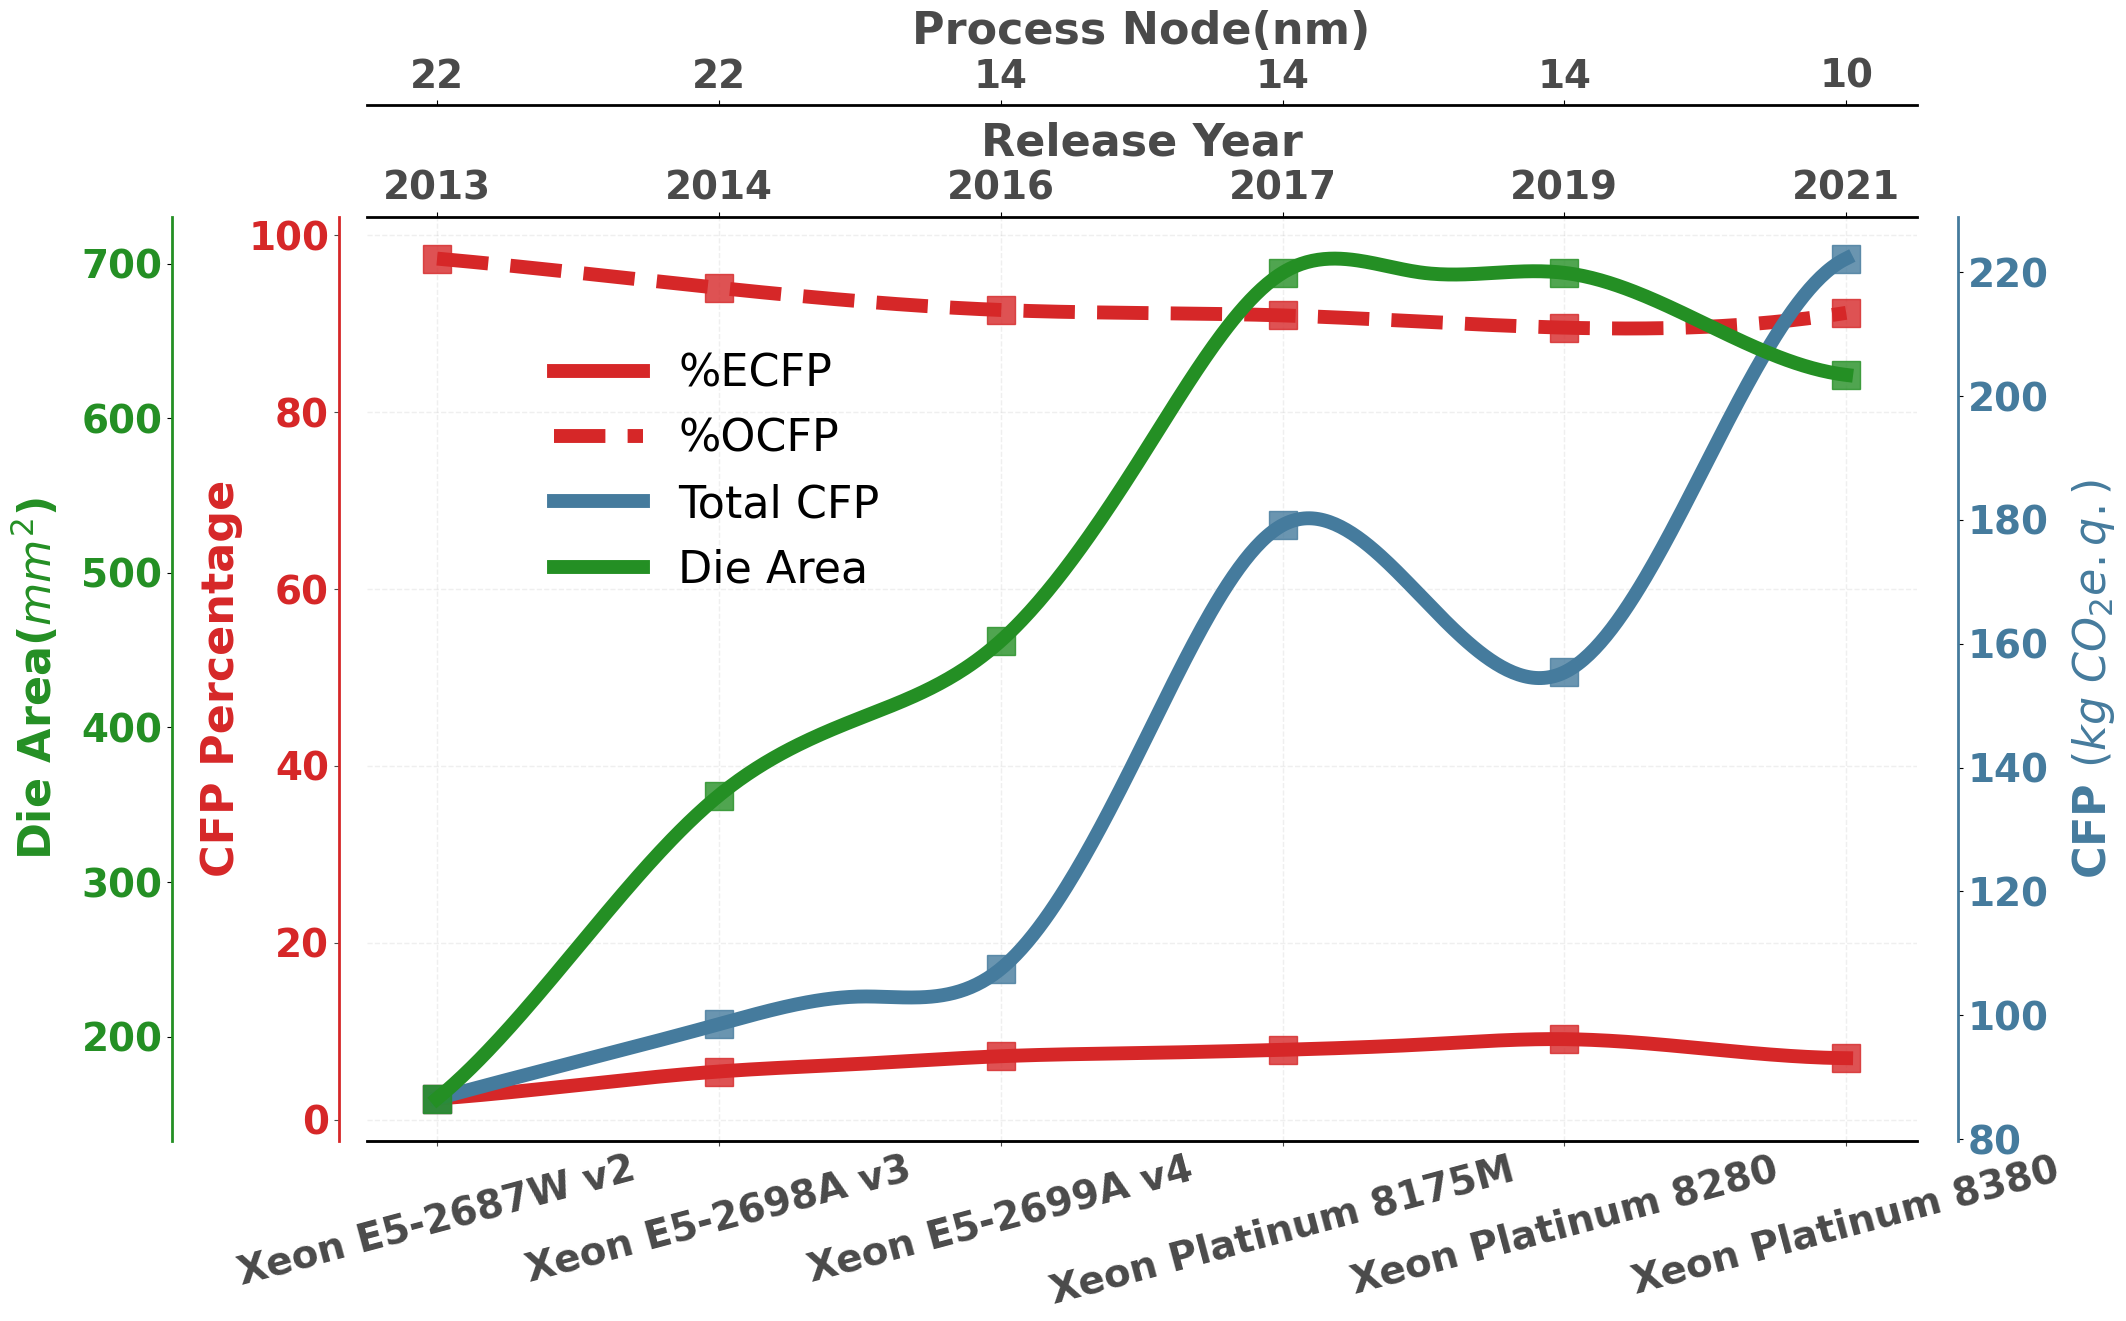

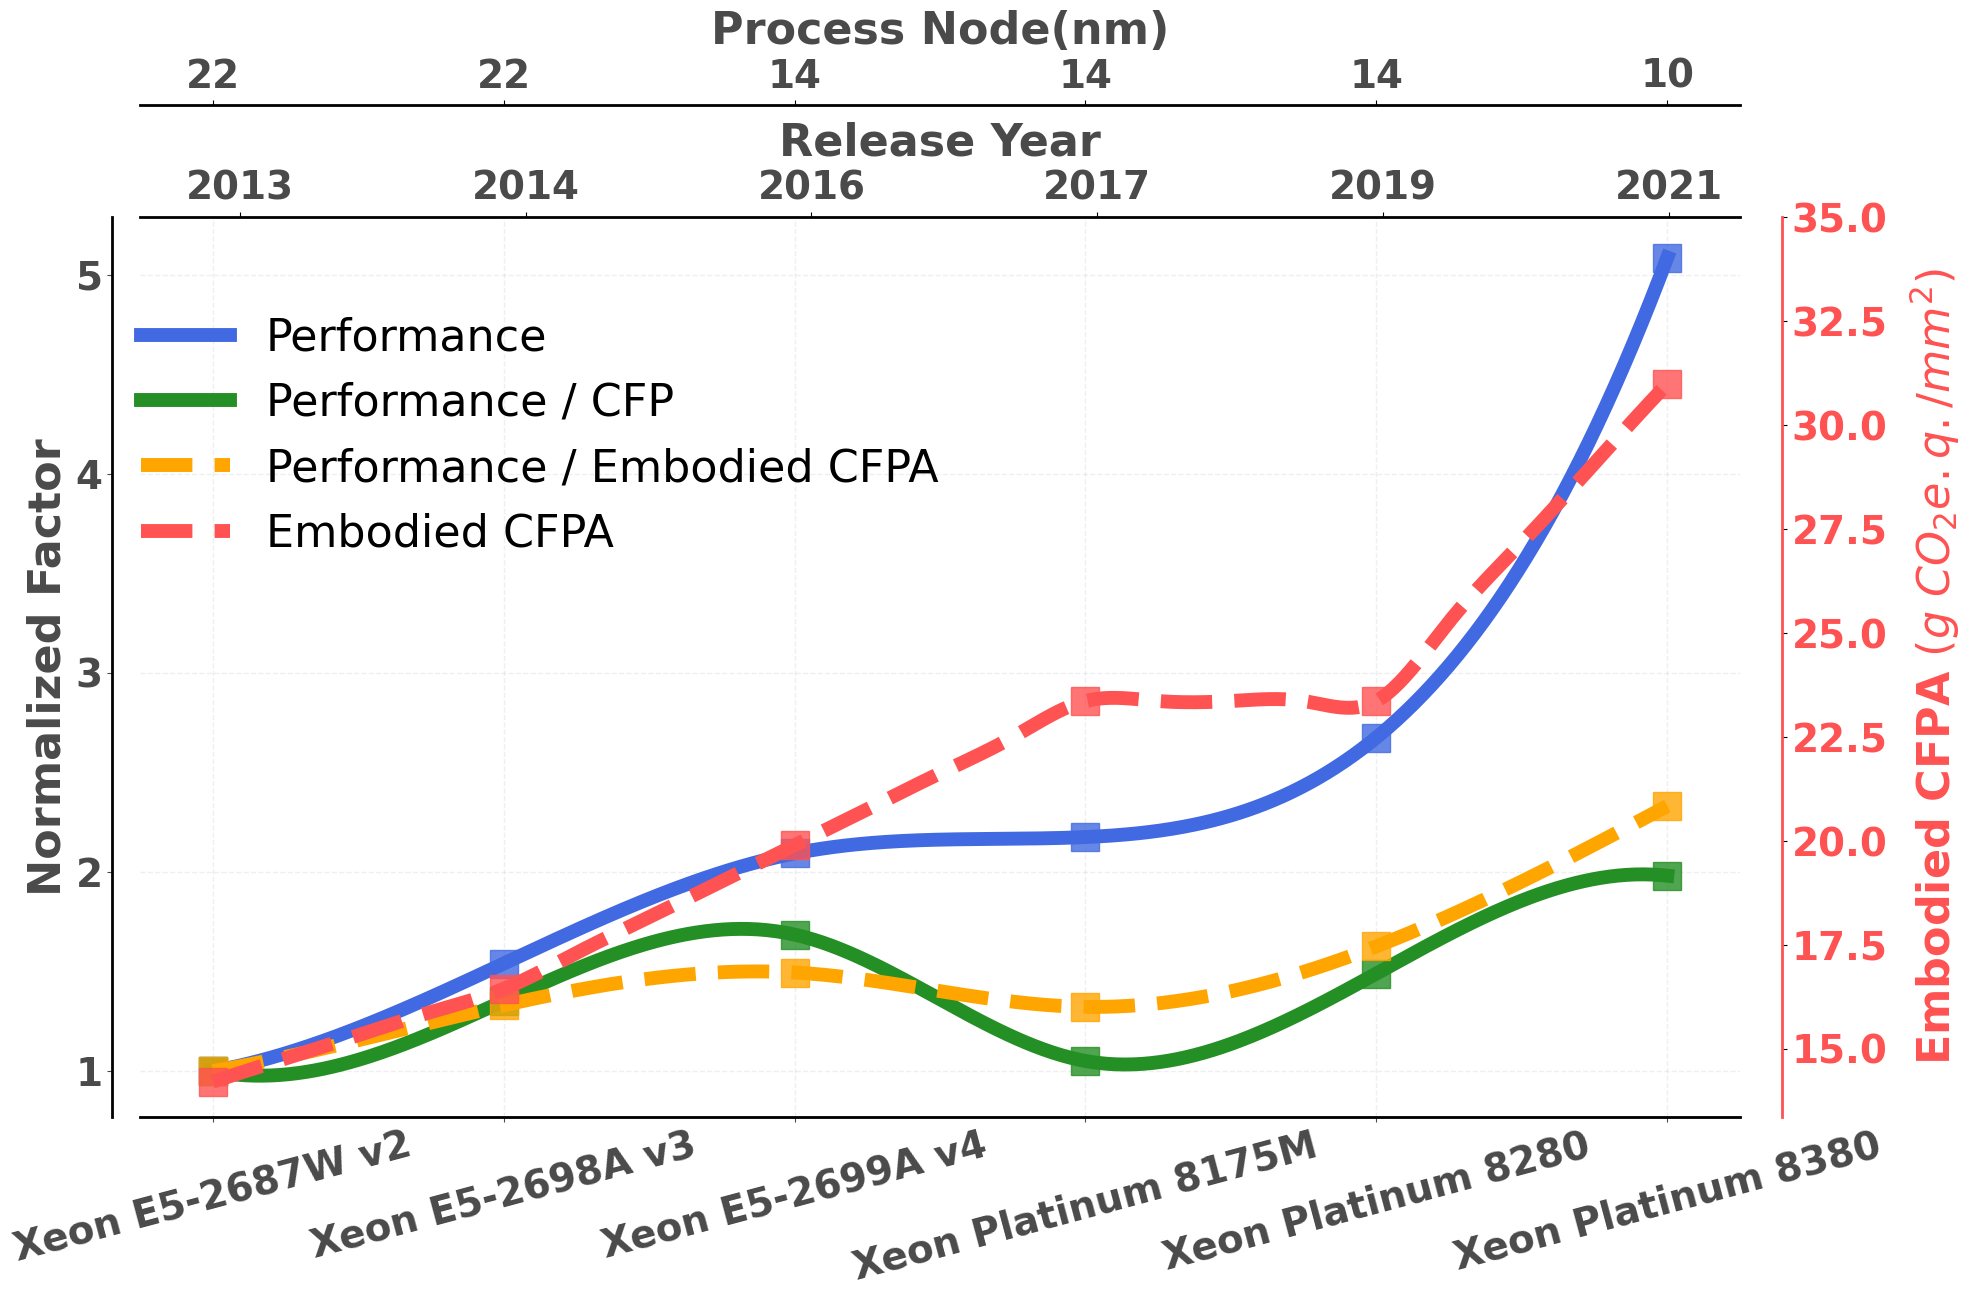

In [ ]:
chip_metrics_fig = chip_metrics_plot(server_cpu, server=True)
perf_metric_fig = performance_metric_plot(server_cpu, server=True)

perf_metric_fig.savefig('new_plots/server_CPU_performance_metrics.pdf', bbox_inches='tight', dpi=300)
chip_metrics_fig.savefig('new_plots/server_CPU_chip_metrics.pdf', bbox_inches='tight', dpi=300)

In [ ]:
desktop_cpu = pd.read_csv('new_csv/Intel-Desktop-CPU.csv')
desktop_cpu['Mfg CFP percentage'] = desktop_cpu['Mfg CFP'] / desktop_cpu['Tot CFP']*100
desktop_cpu['Ope CFP percentage'] = desktop_cpu['Ope CFP'] / desktop_cpu['Tot CFP']*100
desktop_cpu['Single Core Score'] = desktop_cpu['Single Core Score'] / desktop_cpu['Single Core Score'].min()
desktop_cpu['Multi-Core Score'] = desktop_cpu['Multi-Core Score'] / desktop_cpu['Multi-Core Score'].min()
desktop_cpu['Single Core / Embodied CFPA'] = desktop_cpu['Single Core / Embodied CFPA'] / desktop_cpu['Single Core / Embodied CFPA'].min()
desktop_cpu['Single Core / CFP'] = desktop_cpu['Single Core / CFP'] / desktop_cpu['Single Core / CFP'].min()
desktop_cpu['Multi-Core Score / Embodied CFPA'] = desktop_cpu['Multi-Core Score / Embodied CFPA'] / desktop_cpu['Multi-Core Score / Embodied CFPA'].min()
desktop_cpu['Multi-Core / CFP'] = desktop_cpu['Multi-Core / CFP'] / desktop_cpu['Multi-Core / CFP'].min()


desktop_cpu.head()

,Unnamed: 0,Product,Release Date,Process Size (nm),TDP (W),DieSizeValue,Die Size (mm^2),Mfg CFP,Ope CFP,Tot CFP,...,Multi-Core Score,Single Core / Embodied CFPA,Multi-Core Score / Embodied CFPA,Single Core / CFP,Multi-Core / CFP,Des CFP,Operational CFP per unit area,Multi-Core / Embodied CFPA,Mfg CFP percentage,Ope CFP percentage
0,0,Core i7-3940XM,2012,22,55,160,160,2.048041,30.905687,33.179011,...,1.000000,1.060433,1.000000,2.284780,2.186878,0.225282,193.16055,151.53146,6.172702,93.148309
1,1,Core i7-4930K,2013,22,130,257,257,3.570372,73.049807,76.982038,...,1.535067,1.000000,1.535067,1.000000,1.446858,0.361859,284.24048,216.00586,4.637929,94.892014
2,2,Core i7-5960X,2014,22,140,356,356,5.352060,78.669023,84.522335,...,1.164886,1.879632,1.164886,1.839655,1.000000,0.501252,220.98040,152.53722,6.332126,93.074833
3,3,Core i7-6950X,2016,14,140,246,246,3.463967,95.037787,99.243275,...,3.995820,1.800938,1.866482,1.560855,2.921412,0.741521,386.33250,503.23248,3.490380,95.762445
4,4,Core i7-8700K,2017,14,95,154,154,1.987253,64.489927,66.941384,...,3.024152,2.362582,1.412608,2.826697,3.277910,0.464204,418.76578,409.01960,2.968647,96.337905


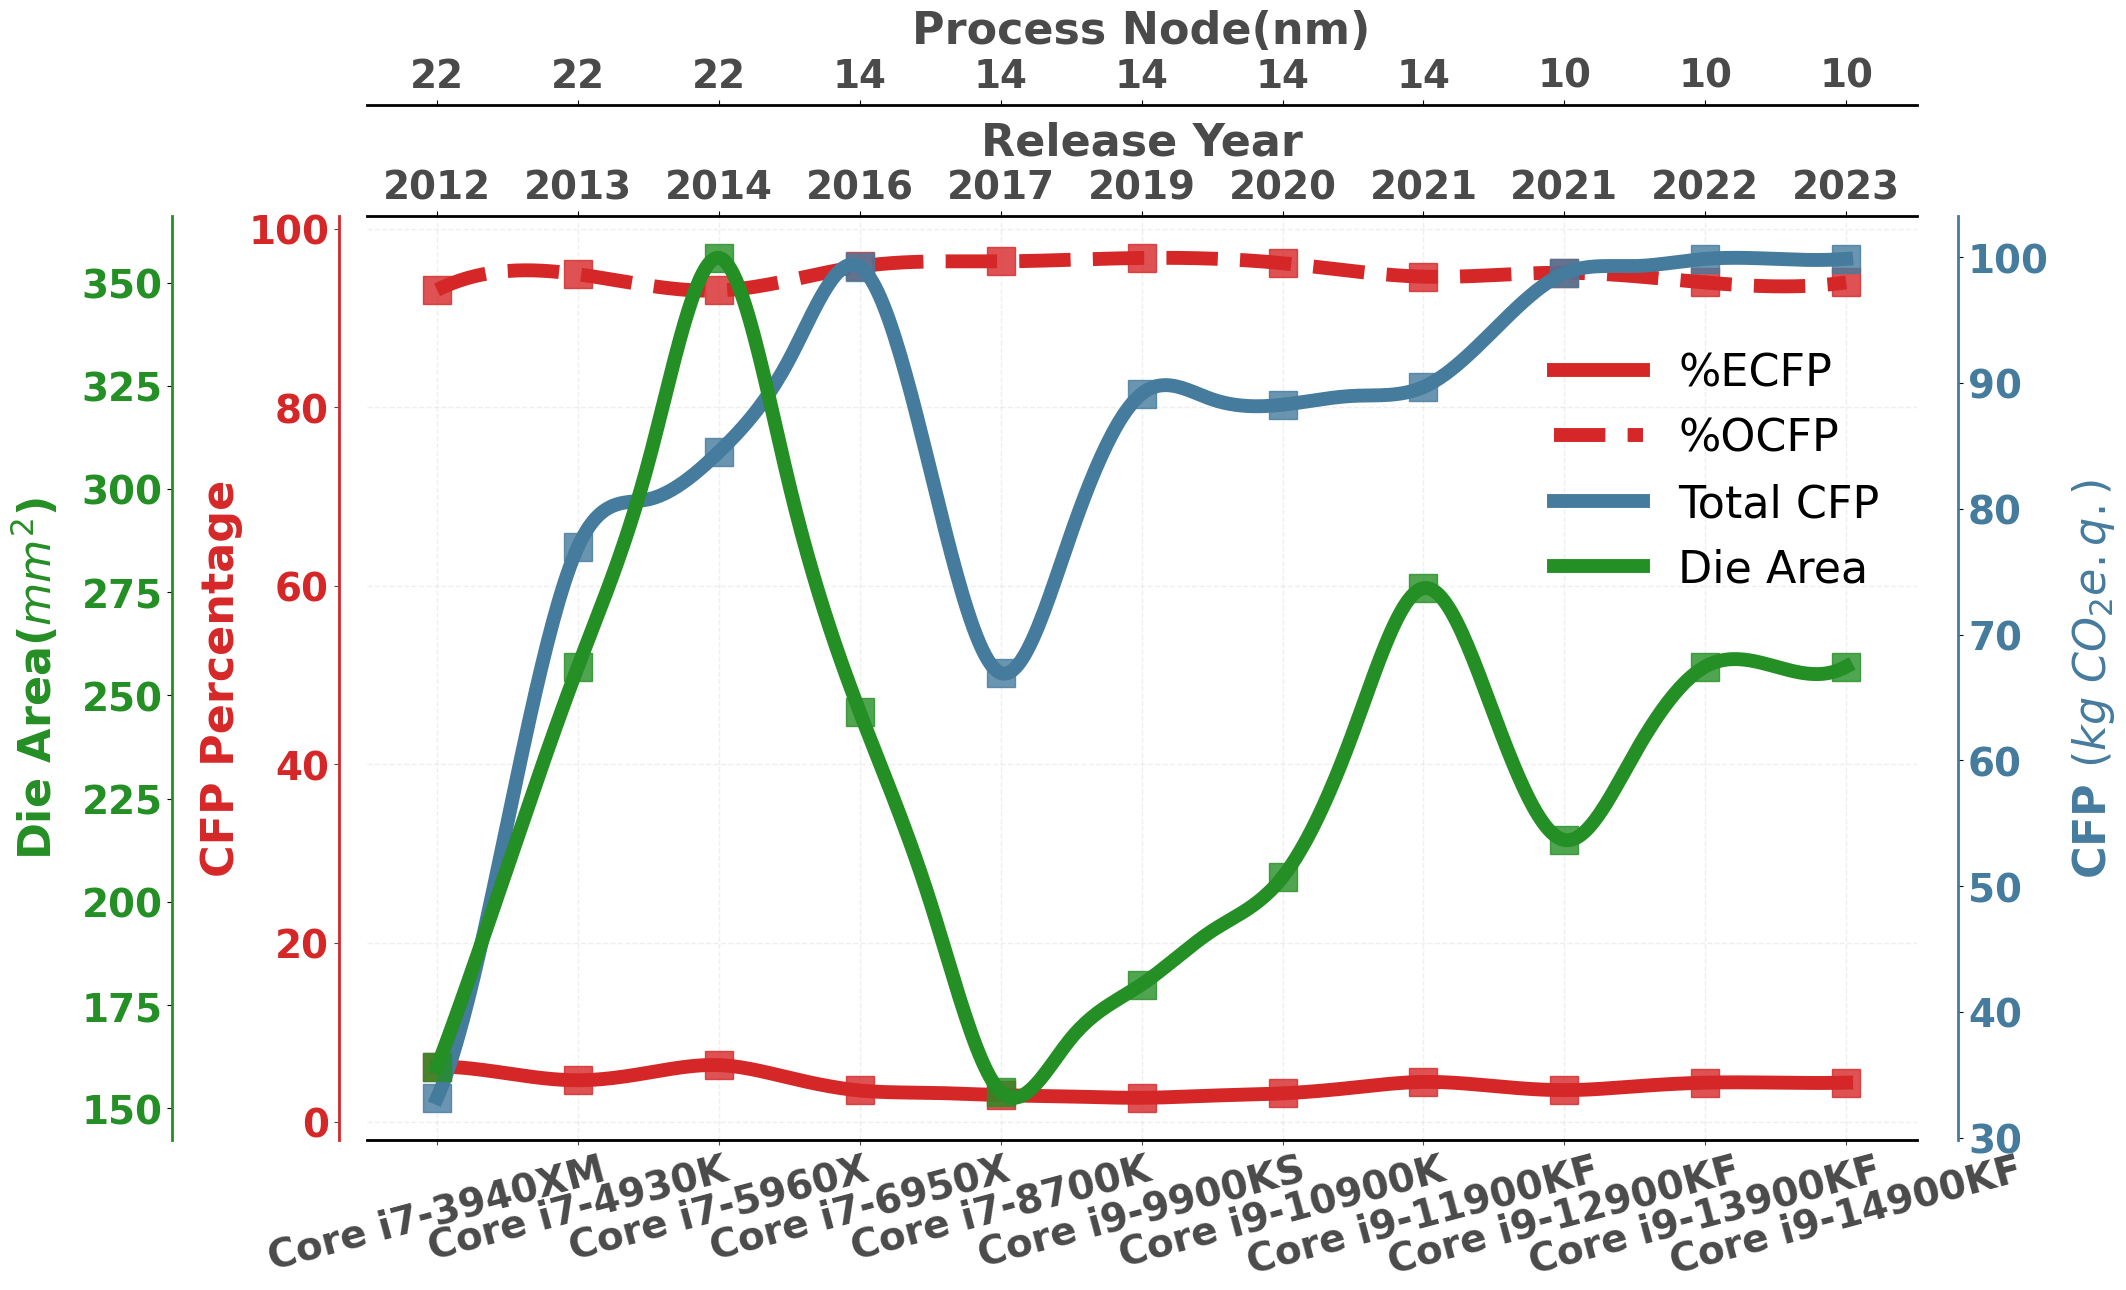

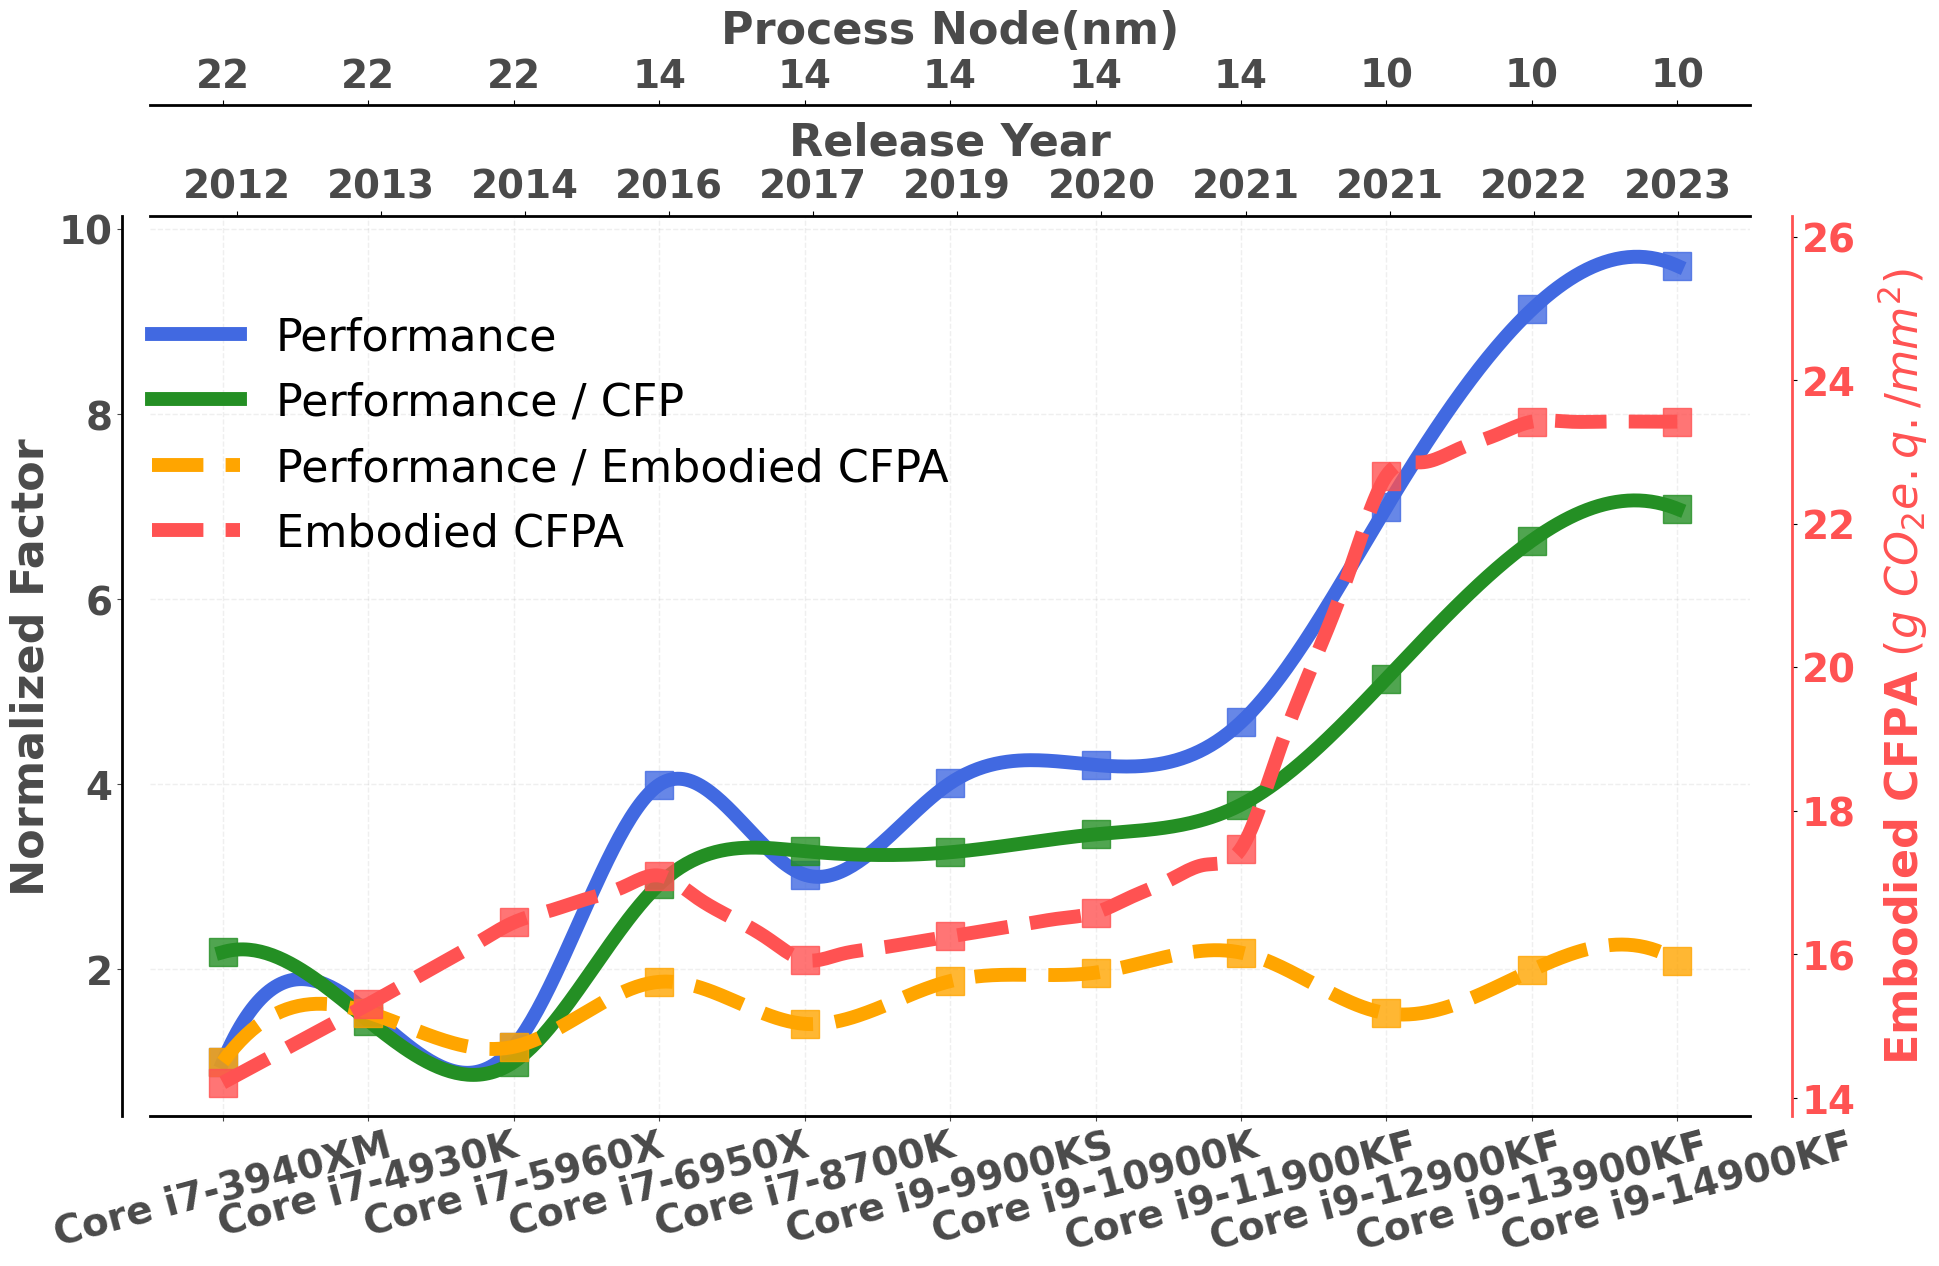

In [ ]:
chip_metrics_fig = chip_metrics_plot(desktop_cpu, server=False)
perf_metric_fig = performance_metric_plot(desktop_cpu, server=False)
perf_metric_fig.savefig('new_plots/desktop_CPU_performance_metrics.pdf', bbox_inches='tight', dpi=300)
chip_metrics_fig.savefig('new_plots/desktop_CPU_chip_metrics.pdf', bbox_inches='tight', dpi=300)